In [1]:
#Importing necessary packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import datetime
from pandas import Series, DataFrame
import pandas_datareader.data as web

In [2]:
#Reading the csv file and storing as dataframe
df = pd.read_csv('AAPL.csv')

In [3]:
#Setting the index as date
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,30.447144,30.478571,30.080000,30.104286,26.272409,88102700
2010-01-04,30.490000,30.642857,30.340000,30.572857,26.681330,123432400
2010-01-05,30.657143,30.798571,30.464285,30.625713,26.727465,150476200
2010-01-06,30.625713,30.747143,30.107143,30.138571,26.302330,138040000
2010-01-07,30.250000,30.285715,29.864286,30.082857,26.253704,119282800


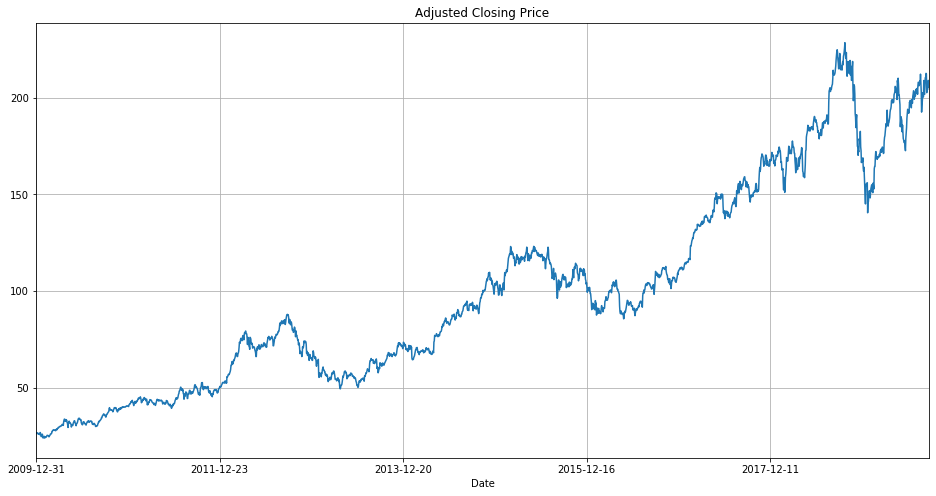

In [4]:
#Plotting the trend
df['Adj Close'].plot.line(label='AAPL', figsize=(16,8), title='Adjusted Closing Price', grid=True)

In [5]:
len(df)

2434

In [8]:
#Train the model on the last 29 days and predict the label for the 30th day
window = 30

num_samples = len(df) - window
indices = np.arange(num_samples).astype(np.int)[:,None] + np.arange(window + 1).astype(np.int)
indices

array([[   0,    1,    2, ...,   28,   29,   30],
       [   1,    2,    3, ...,   29,   30,   31],
       [   2,    3,    4, ...,   30,   31,   32],
       ...,
       [2401, 2402, 2403, ..., 2429, 2430, 2431],
       [2402, 2403, 2404, ..., 2430, 2431, 2432],
       [2403, 2404, 2405, ..., 2431, 2432, 2433]])

In [10]:
data = df['Adj Close'].values[indices]
data

array([[ 26.272409,  26.68133 ,  26.727465, ...,  24.768839,  24.982042,
         25.358553],
       [ 26.68133 ,  26.727465,  26.30233 , ...,  24.982042,  25.358553,
         25.252583],
       [ 26.727465,  26.30233 ,  26.253704, ...,  25.358553,  25.252583,
         25.299952],
       ...,
       [204.881561, 201.823181, 206.435654, ..., 204.160004, 205.529999,
        209.009995],
       [201.823181, 206.435654, 208.049515, ..., 205.529999, 209.009995,
        208.740005],
       [206.435654, 208.049515, 207.880173, ..., 209.009995, 208.740005,
        205.699997]])

In [14]:
X = data[:, :-1]
y = data[:, -1]

In [15]:
split_frac = 0.8
split_indices = int(split_frac * num_samples)
X_train = X[:split_indices]
y_train = y[:split_indices]
X_test = X[split_indices:]
y_test = y[split_indices:]
split_indices

1923